In [1]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [5]:
filenames = next(walk('/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/gt/'), (None, None, []))[2]

In [10]:
def getCmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    rand = np.load(path + 'rand_cmaps/' + file)
    return gt, alpha, esm, pcons, rand

In [12]:
path='/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/'
for file in filenames:
        # Load the contact maps
        print(file)
        gt,alpha,esm,pcons,rand=getCmaps(file,path)
        #print(gt.shape,alpha.shape,esm.shape,pcons.shape,rand.shape)

P11802.npy
P19784.npy
P24941.npy
P50750.npy
Q16539.npy
P67870.npy
P06493.npy
P17612.npy
P68400.npy
P28482.npy
Q00535.npy
P27361.npy
O43741.npy


In [3]:
#Without missing residues
files= [
 'P19784.npy',
 'P24941.npy',
 'P50750.npy',
 'Q16539.npy',
 'P06493.npy',
 'Q00535.npy',
 'O43741.npy']

### MCNemar Test

In [32]:
from scipy.stats import chi2_contingency


path = '/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/'


cmaps = []
for file in files:
    cmaps.append(getCmaps(file, path))


methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4", "rand_cmaps"]

# Perform McNemar test 
method1 = "alpha_fold_cmaps"
method2 = "esm_cmaps"
contingency_table = np.zeros((2, 2))
for cmap in cmaps:
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
    cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
    cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
    contingency_table[0, 0] += np.sum(np.logical_and(cmap1_true, cmap2_true))
    contingency_table[0, 1] += np.sum(np.logical_and(cmap1_true, cmap2_false))
    contingency_table[1, 0] += np.sum(np.logical_and(cmap1_false, cmap2_true))
    contingency_table[1, 1] += np.sum(np.logical_and(cmap1_false, cmap2_false))
    try:
        chi2, p_value, df, expected = chi2_contingency(contingency_table)
        p_values[i, j] = p_value
    except ValueError:
            # Set p-value to 1 if the contingency table has a zero element
        p_values[i, j] = 1
        continue


print(f"The p-value for {method1} and {method2} is {p_value:.50f}.")
print(f"The chi2-value for {method1} and {method2} is {chi2:.50f}.")

The p-value for alpha_fold_cmaps and esm_cmaps is 0.00000000000000000000000000000000000000000000000000.
The chi2-value for alpha_fold_cmaps and esm_cmaps is 740.55863377541254521929658949375152587890625000000000.


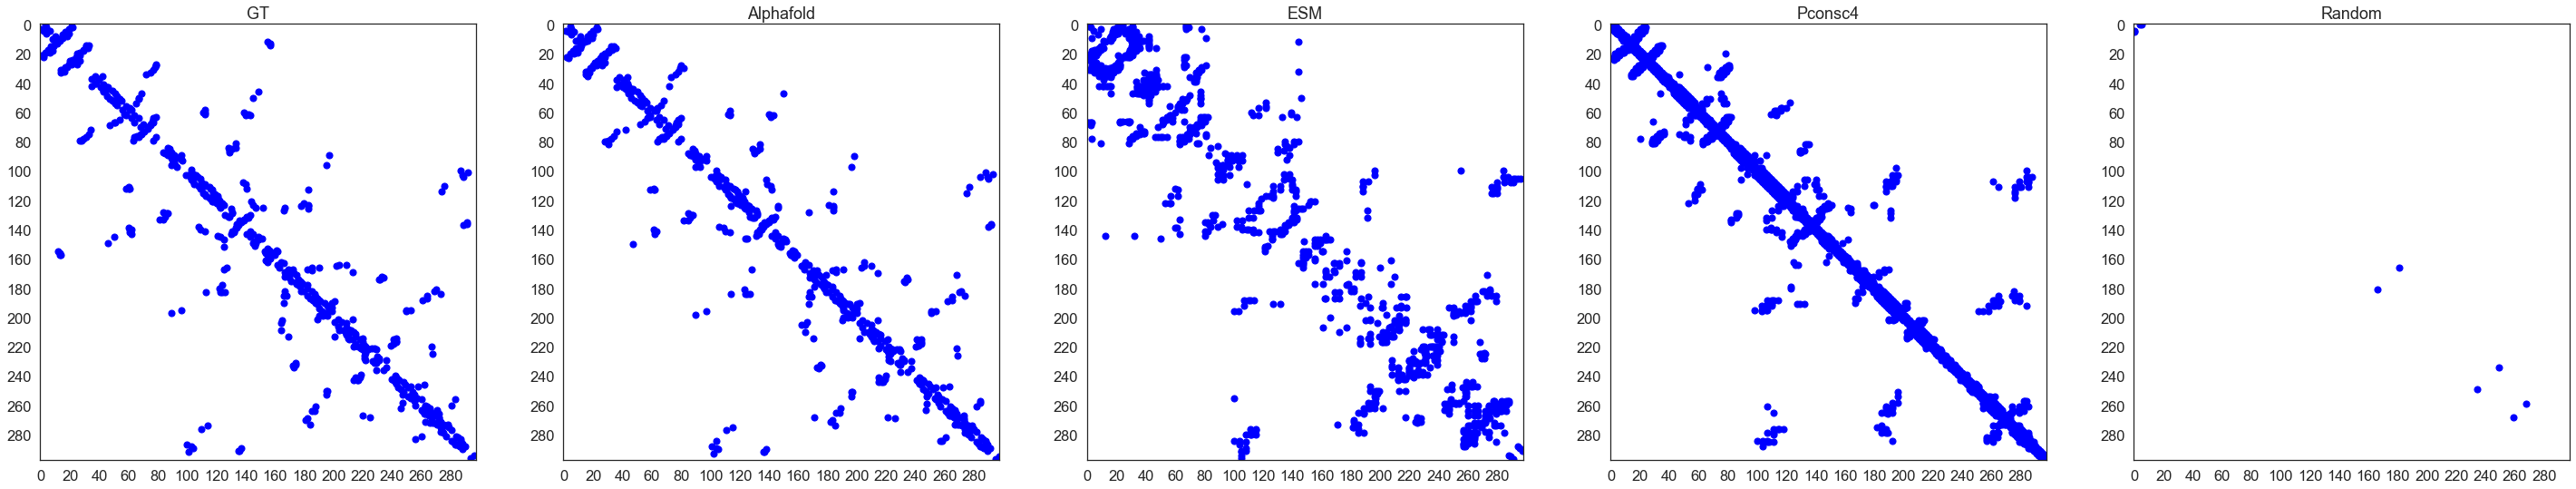

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gt,alpha,esm,pcons,rand=getCmaps('P19784.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')

G = gt
L = alpha
H=esm
J=pcons
I=rand
# Create subplots with Seaborn
fig, axs = plt.subplots(1, 5, figsize=(50,20))
# Plot G
x_indices = np.argwhere(G == 1)
axs[0].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[0].imshow(G, cmap='binary', alpha=0.2)
axs[0].set_title('GT')

# Plot L
x_indices = np.argwhere(L == 1)
axs[1].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[1].imshow(L, cmap='binary', alpha=1)
axs[1].set_title('Alphafold')

# Plot L

x_indices = np.argwhere(H == 1)
axs[2].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[2].imshow(H, cmap='binary', alpha=1)
axs[2].set_title('ESM')
# Plot L
x_indices = np.argwhere(J == 1)
axs[3].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[3].imshow(J, cmap='binary', alpha=1)
axs[3].set_title('Pconsc4')
# Plot L
x_indices = np.argwhere(I == 1)
axs[4].scatter(x_indices[:, 1], x_indices[:, 0], color='blue', s=50)
axs[4].imshow(I, cmap='binary', alpha=1)
axs[4].set_title('Random')

axs[0].set_xticks(range(0,gt.shape[0], 20))
axs[0].set_yticks(range(0,gt.shape[0], 20))
axs[1].set_xticks(range(0,gt.shape[0],20))
axs[1].set_yticks(range(0,gt.shape[0], 20))
axs[2].set_xticks(range(0,gt.shape[0],20))
axs[2].set_yticks(range(0,gt.shape[0], 20))
axs[3].set_xticks(range(0,gt.shape[0],20))
axs[3].set_yticks(range(0,gt.shape[0], 20))
axs[4].set_xticks(range(0,gt.shape[0],20))
axs[4].set_yticks(range(0,gt.shape[0], 20))
plt.show()
final_result_path='/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results/contact_comparisions/'+"P19784_cmaps_comp"+".png"
    
    
fig.savefig(final_result_path, dpi=300, bbox_inches='tight')




In [140]:
sns.set(font_scale = 1,style="white")

In [ ]:
def comparision_contactMaps(gt,alpha,esm,pcons,rand,results_path,file):
    fig = plt.figure()
#     title_text='Comparative Analysis of Contact Maps - %s'%(file)
#     fig.suptitle(title_text, fontsize=11,fontweight='bold')
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
    #fig.suptitle(title_text, fontsize=14,fontweight='bold')
    
   
    
    G=gt
    
    #AlphaFold
    ax[0].set_aspect('equal', adjustable='box')
    P=alpha
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    #ax[0].title.set_text('AlphaFold2')
    ax[0].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[0].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.8,label="Contact Lost")
    ax[0].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=1,label="True Contact")
   

   
    ax[1].set_aspect('equal', adjustable='box')
    #ax[1].title.set_text('Pconcs4')
    
    #Pconcs4
    P=pcons
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    ax[1].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[1].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[1].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
    #F0CD30#FD5F00
    #ESM
    ax[2].set_aspect('equal', adjustable='box')
    P=esm
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)
    
    ax[2].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[2].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[2].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=40,marker='s', alpha=0.6,label="True Contact")
   
    
    #Random
    ax[3].set_aspect('equal', adjustable='box')
    P=rand
    # Calculate X and Y
    X = np.where(np.logical_and(G==1, P==0), 1, 0)
    Y = np.where(np.logical_and(G==1, P==1), 1, 0)
    Z=np.where(np.logical_and(G==0, P==1), 1, 0)
    
    # Create a scatter plot
    x_indices = np.argwhere(X == 1)
    y_indices = np.argwhere(Y == 1)
    z_indices=np.argwhere(Z == 1)

    ax[3].scatter(z_indices[:,0],z_indices[:,1], color='#CC37B4',s=30,marker="o", alpha=0.8,label="False Contact")
    ax[3].scatter(x_indices[:, 0], x_indices[:, 1], color='#EF9730', s=30,marker="x", alpha=0.6,label="Contact Lost")
    ax[3].scatter(y_indices[:, 0], y_indices[:, 1], color='#047F8F', s=30,marker='s', alpha=0.6,label="True Contact")
   
    
    #ax[3].title.set_text('Random')



    #ax[3].legend(loc='upper right',bbox_to_anchor=(1.59,0.65))
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5))
    handles, labels = ax[3].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right',bbox_to_anchor=(1, 0.65))
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    ax[2].invert_yaxis()
    ax[3].invert_yaxis()
#     ax[0].set_xlabel('Amino acids')
#     ax[0].set_ylabel('Amino acids')
#     ax[1].set_xlabel('Amino acids')
#     ax[1].set_ylabel('Amino acids')
#     ax[2].set_xlabel('Amino acids')
#     ax[2].set_ylabel('Amino acids')
#     ax[3].set_xlabel('Amino acids')
#     ax[3].set_ylabel('Amino acids')
    

    ax[0].set_xticks(range(0,gt.shape[0], 100))
    ax[0].set_yticks(range(0,gt.shape[0], 100))
    ax[1].set_xticks(range(0,gt.shape[0],100))
    ax[1].set_yticks(range(0,gt.shape[0], 100))
    ax[2].set_xticks(range(0,gt.shape[0], 100))
    ax[2].set_yticks(range(0,gt.shape[0], 100))
    ax[3].set_xticks(range(0,gt.shape[0], 100))
    ax[3].set_yticks(range(0,gt.shape[0], 100))
#     ax[0].set_xticks(range(0,gt.shape[0], 50))
#     ax[0].set_yticks(range(0,gt.shape[0], 50))
#     ax[1].set_xticks(range(0,gt.shape[0], 50))
#     ax[1].set_yticks(range(0,gt.shape[0], 50))
#     ax[2].set_xticks(range(0,gt.shape[0], 50))
#     ax[2].set_yticks(range(0,gt.shape[0], 50))
#     ax[3].set_xticks(range(0,gt.shape[0], 50))
#     ax[3].set_yticks(range(0,gt.shape[0], 50))
    fig.tight_layout()
    fig.supxlabel('Amino Acids',fontsize=20,y=0.33,ha='center',va='center')
    fig.supylabel('Amino Acids',fontsize=20,x=0.01,ha='center',va='center')
    final_result_path=results_path+file[:-4]+"_cmaps_"+".pdf"
    final_result_path1=results_path+file[:-4]+"_cmaps_"+".png"
    
    fig.savefig(final_result_path, dpi=300, bbox_inches='tight')
    fig.savefig(final_result_path1, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

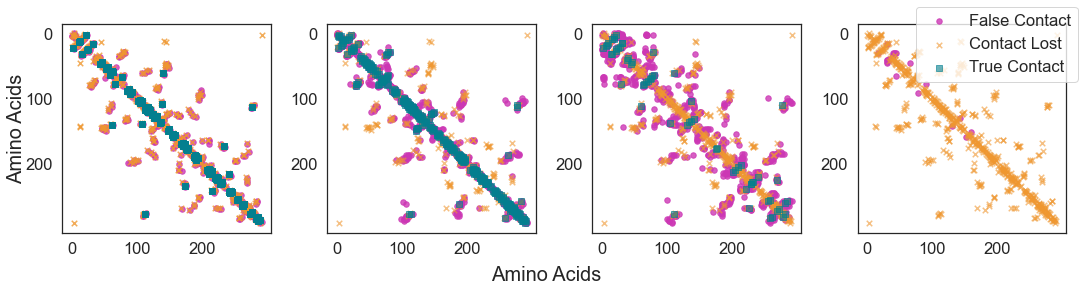

In [62]:
gt,alpha,esm,pcons,rand=getCmaps('Q00535.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'Q00535_2.npy')

<Figure size 432x288 with 0 Axes>

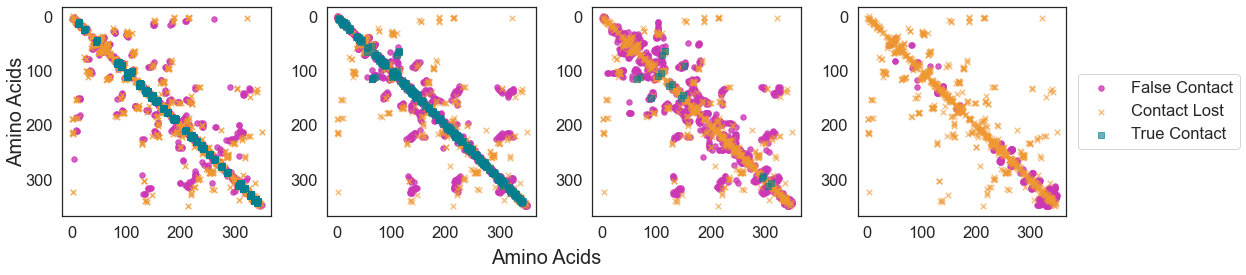

In [13]:
gt,alpha,esm,pcons,rand=getCmaps('P19784.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'P19784.npy')

<Figure size 432x288 with 0 Axes>

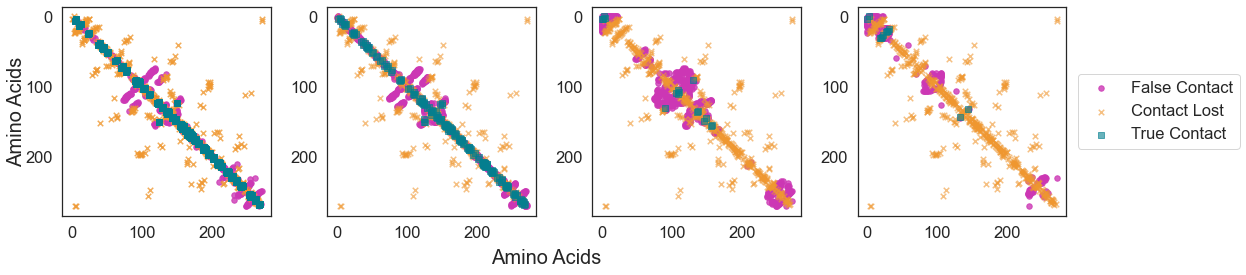

In [15]:
gt,alpha,esm,pcons,rand=getCmaps('O43741.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'O43741.npy')

<Figure size 432x288 with 0 Axes>

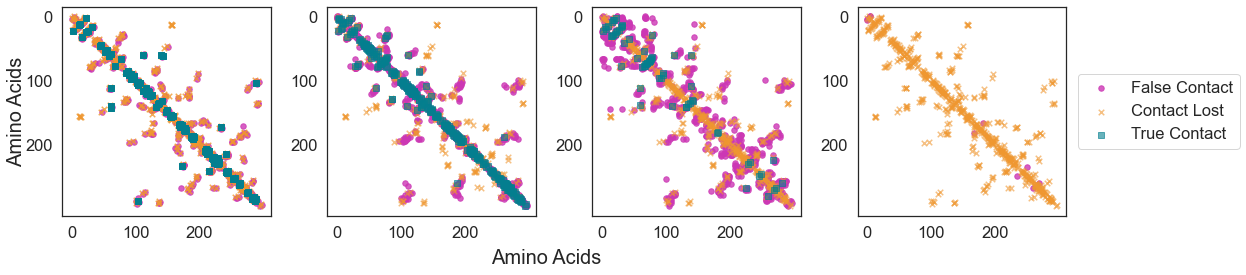

In [18]:
gt,alpha,esm,pcons,rand=getCmaps('P24941.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'P24941.npy')

<Figure size 432x288 with 0 Axes>

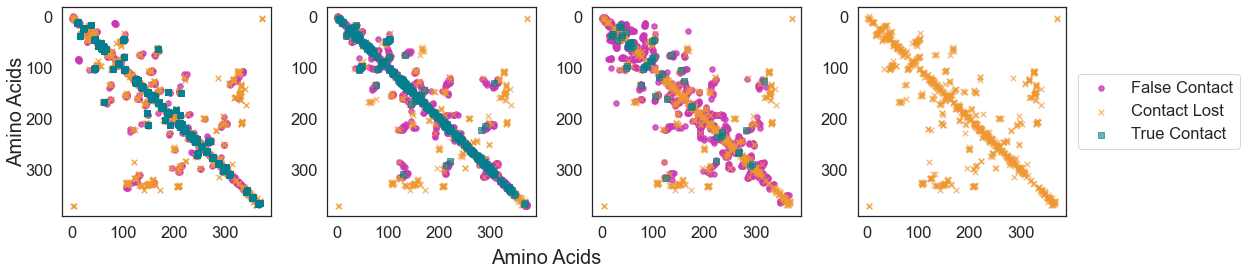

In [19]:
gt,alpha,esm,pcons,rand=getCmaps('P50750.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'P50750.npy')

<Figure size 432x288 with 0 Axes>

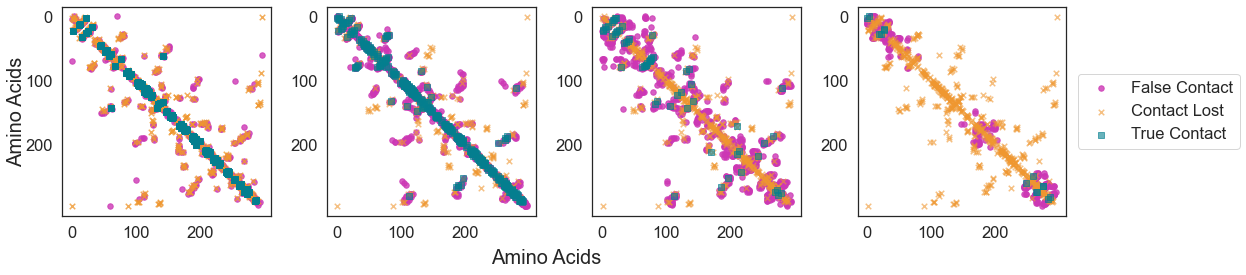

In [21]:
gt,alpha,esm,pcons,rand=getCmaps('P06493.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4_6/",'P06493.npy')

<Figure size 432x288 with 0 Axes>

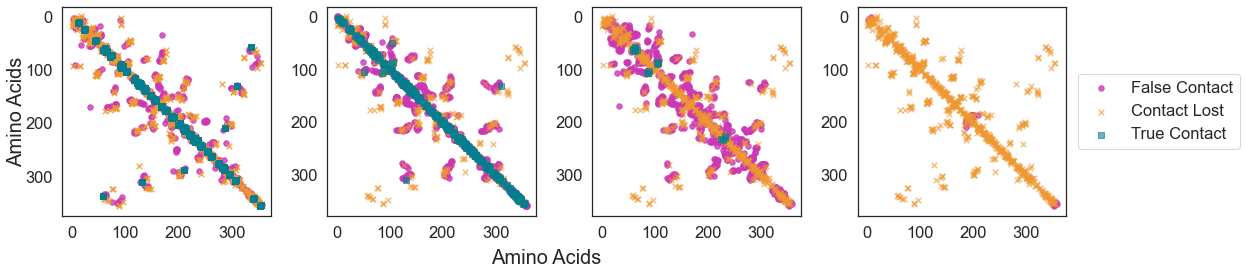

In [20]:
gt,alpha,esm,pcons,rand=getCmaps('Q16539.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')
comparision_contactMaps(gt,alpha,esm,pcons,rand,"/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/results4/",'Q16539.npy')